Projet : Accident de la route
==============

## Etape 2 : Pré-processing



### Import des données

In [3]:
# import des librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# librairie pour afficher toutes les colonnes du dataframe
pd.set_option('display.max_columns', None)
pd.options.display.max_info_columns

100

In [4]:
# import du dataset
df = pd.read_csv("dataset/dataset_to_prepro.csv")
df.head()

C:\Users\thfam\AppData\Local\Temp\ipykernel_42736\2666441893.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/dataset_to_prepro.csv")


,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,16:15,1,26,26198,2,3,1,3,"44,5594200000","4,7257200000",1,2,0,2,1,9,1,2022
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,16:15,1,26,26198,2,3,1,3,"44,5594200000","4,7257200000",1,7,0,2,2,1,1,2022
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,08:34,1,25,25204,2,3,1,3,"46,9258100000","6,3462000000",2,7,0,2,8,15,1,2022
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,08:34,1,25,25204,2,3,1,3,"46,9258100000","6,3462000000",2,10,0,2,1,1,1,2022
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,17:15,1,22,22360,2,6,1,2,"48,4931620000","-2,7604390000",2,7,0,2,1,2,1,2022


## Pré-processing des données

A cette étape, nous avons commencé par transformer les données qui contiennent du texte et des erreurs en variables numériques.

#### Transformation en variable numérique

In [8]:
# variables non numériques à traiter
df.select_dtypes(exclude='number').columns

Index(['nbv', 'hrmn', 'dep', 'com', 'lat', 'long'], dtype='object')

In [9]:
# nbv : nombre de voies de circulation
print("Avant traitement :", df.nbv.unique())

# Convertir toutes les valeurs en chaînes de caractères
df['nbv'] = df['nbv'].replace([-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
                                      ['-1','0','1','2', "3", '4', '5', '6', '7', '8', '9', '10', '11', '12'])

# enlever l'espace avant la négation
df['nbv'] = df['nbv'].str.replace(' -1', '-1')

# remplacer les #ERREUR en 13
df['nbv'] = df['nbv'].str.replace('#ERREUR', '13')

# transformer en variable numérique
df["nbv"] = df["nbv"].astype(int)

# vérification de la répartition
print("Après préprocessing :", df.nbv.unique())
df.nbv.value_counts()

Avant traitement : [2 1 4 3 6 0 9 8 -1 5 7 12 10 '4' '1' '2' '5' '3' '6' '0' '8' ' -1' '9'
 '10' '7' '12' '#ERREUR' '11' 11]
Après préprocessing : [ 2  1  4  3  6  0  9  8 -1  5  7 12 10 13 11]


nbv
 2     294193
 4      63139
 1      46679
 3      41387
 6      14756
 0      11360
 5       9203
-1       4785
 8       4780
 7       1598
 10      1127
 9        740
 12       240
 11       193
 13         2
Name: count, dtype: int64

In [10]:
# dep : département

# remplacer les dpt 2A et 2B de la Corse par 20
df['dep'] = df['dep'].str.replace('2A', '20')
df['dep'] = df['dep'].str.replace('2B', '20')

# transformer en variable numérique
df["dep"] = df["dep"].astype(int)

# vérification de la répartition
df["dep"].unique()

array([ 26,  25,  22,  16,  13,  12,  10,   9,   6,   3,   2,  75,  94,
        93,  92,  76,  68, 972,  63,  62,  51,  20,  65,  33,  71,  89,
        61,  29,  38,  14,  60,  45,  73,  53,  24,  27,  17,  48, 973,
        77,  67, 988,   8,  56,  69,  91,  78,  64,  59,  49,  42,  37,
        34,  32,  31,  11,  35,  47,  86,   1,  74,  79,  46,  39,  72,
         5,  18,  19, 971, 987,  66,  84,  85,  95,  57,  54,  52,  50,
        44, 974,  83,  28,  15,   7,  80,  30,  41,  82,  55,  43,  40,
         4, 986,  88,  36,  87,  21, 976,  81,  58,  70,  90,  23, 977,
       978, 975])

In [11]:
# com : commune

# remplacer les communes de la Corse par 20
df['com'] = df['com'].str.replace('B', '0')
df['com'] = df['com'].str.replace('A', '0')

# remplacer le N/C par la commune correspondante : 14061
df['com'] = df['com'].str.replace('N/C', '14061')

# transformer en variable numérique
df["com"] = df["com"].astype(int)

# vérification de la répartition
df["com"].unique()

array([26198, 25204, 22360, ..., 25522, 17063, 85099])

In [12]:
# lat : latitude

# Convertir toutes les valeurs en chaînes de caractères
df["lat"] = [str(value) for value in df["lat"]]

# remplacer les virgules par des points
df["lat"] = [value.replace(',', '.') for value in df["lat"]]

# transformer en variable numérique
df["lat"] = df["lat"].astype(float)

In [13]:
# long : longitude

# Convertir toutes les valeurs en chaînes de caractères
df["long"] = [str(value) for value in df["long"]]

# remplacer les virgules par des points
df["long"] = [value.replace(',', '.') for value in df["long"]]

# transformer en variable numérique
df["long"] = df["long"].astype(float)

### Création de nouvelles colonnes

In [15]:
# hrnm : heures et minutes

# séparer les heures des minutes
sepa_values = [value.split(':') for value in df["hrmn"] ]

# création de la variable heure et la variable minute
df["heure"] = [value[0] for value in sepa_values]
df["minute"] = [value[1] for value in sepa_values]

# transformer en variable numérique
df["heure"] = df["heure"].astype(int)
df["minute"] = df["minute"].astype(int)

# suppression de la variable hrmn
df = df.drop(["hrmn"], axis=1)
df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15


In [16]:
# création d'une tranche d'age
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] # 1: 0 à 10, 2: 21-30, '3: 31-40, 4: 41-50, 5: 51-60, 6: 61-70, 7: 70 et plus


df['age'] = df['an'] - df['an_nais']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_group'] = df['age_group'].replace([7, 8, 9, 10, 11, 12, 13], 7)

df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3


In [17]:
# création d'une tranche horaire

bins = [1, 5, 7, 10, 13, 16, 19, 22]
labels = [100, 200, 300, 400, 500, 600, 700]

df['h_group'] = pd.cut(df['heure'], bins=bins, labels=labels, right=False)
df['h_group'] = df['h_group'].replace([100, 200, 300, 400, 500, 600, 700], [1, 2, 3, 4, 5, 6, 7])

df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2,6
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7,6
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4,3
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6,3
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3,6


In [18]:
# Travail sur les dates

# mois
df.mois.value_counts()

print("corrélation entre les mois et la gravité :",np.corrcoef(df['mois'], df['grav']))

# jour
df.jour.value_counts()

print("corrélation entre les jours et la gravité :", np.corrcoef(df['jour'], df['grav']))

corrélation entre les mois et la gravité : [[ 1.000000e+00 -2.902773e-04]
 [-2.902773e-04  1.000000e+00]]
corrélation entre les jours et la gravité : [[ 1.00000000e+00 -5.72081263e-05]
 [-5.72081263e-05  1.00000000e+00]]


En ce qui concerne les mois et le jour de l'accident, la corrélation est très faible entre la gravité et le mois et le jour, indiquant une relation linéaire très faible entre ces variables. De plus il n'y a pas de différences significatives sur la quantité d'accidents en fonction des mois ou des jours. 

In [20]:
df['date_obj'] = pd.to_datetime(df['an'].astype(str) + '-' + df['mois'].astype(str) + '-' + df['jour'].astype(str))

df['weekday'] = df['date_obj'].apply(lambda x: x.weekday())

df.head()

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group,date_obj,weekday
0,1,1,3,1,2008.0,5,2,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,2,0,2,1,9,1,2022,16,15,14.0,2,6,2022-10-19,2
1,1,1,1,1,1948.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.559420,4.725720,1,7,0,2,2,1,1,2022,16,15,74.0,7,6,2022-10-19,2
2,1,1,4,1,1988.0,9,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,7,0,2,8,15,1,2022,8,34,34.0,4,3,2022-10-20,3
3,1,1,1,1,1970.0,4,1,0,4,2,2,0,1,1,1,0,1,50,20,10,2022,1,25,25204,2,3,1,3,46.925810,6.346200,2,10,0,2,1,1,1,2022,8,34,52.0,6,3,2022-10-20,3
4,1,1,1,1,2002.0,0,1,-1,3,-1,2,0,1,1,1,5,1,50,20,10,2022,1,22,22360,2,6,1,2,48.493162,-2.760439,2,7,0,2,1,2,1,2022,17,15,20.0,3,6,2022-10-20,3


Dans cet exemple, la colonne 'weekday' contiendra un nombre entier qui représente le jour de la semaine :

    0 pour lundi
    1 pour mardi
    2 pour mercredi
    3 pour jeudi
    4 pour vendredi
    5 pour samedi
    6 pour dimanche

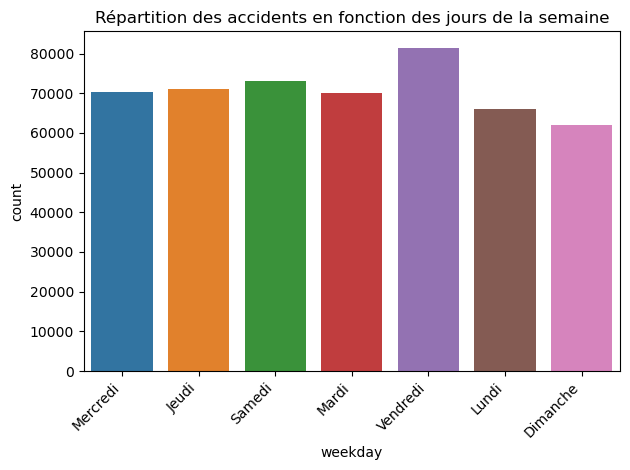

In [22]:
df_mod = df.copy()
df_mod['weekday'] = df_mod['weekday'].replace({
   0: 'Lundi',
   1: 'Mardi',
   2: 'Mercredi',
   3: 'Jeudi',
   4: 'Vendredi',
   5: 'Samedi',
   6: 'Dimanche'
})

# Afficher la répartition des accidents en fonction du jour de la semaine avec Seaborn
sns.countplot(x='weekday', data=df_mod)

# Personnaliser les étiquettes de l'axe x avec rotation oblique
plt.xticks(rotation=45, ha='right')  # Rotation de 45 degrés, alignées à droite

# Ajouter un titre au graphique
plt.title('Répartition des accidents en fonction des jours de la semaine')

# Afficher le graphique
plt.tight_layout()  # Ajuster la mise en page pour éviter la coupure des étiquettes
plt.show()

### Regroupement de catégories

In [24]:
# trajet : transformer les non concerné en non renseigné
df['trajet'] = df['trajet'].mask(df['trajet'] < 0, 0)

# locp : regroupement de catégorie entre elles
df['locp'] = df['locp'].replace([2, 4], # 1 et 2 => 1 pour piéton sur chaussé
                                [1, 2]) # 3 et 4 => 2 pour piéton sur passage piéton

df['locp'] = df['locp'].replace([5,6,7,8,9], 3) # 5 à 9 => 3 pour piéton sur divers

# regrouper le nb de voies supérieur à 9 en une variable : plus de 9                                  
df['nbv'] = df['nbv'].replace([9,10,11,12,13], 9) # 9 à 13 => 9 pour plus de 9 voies

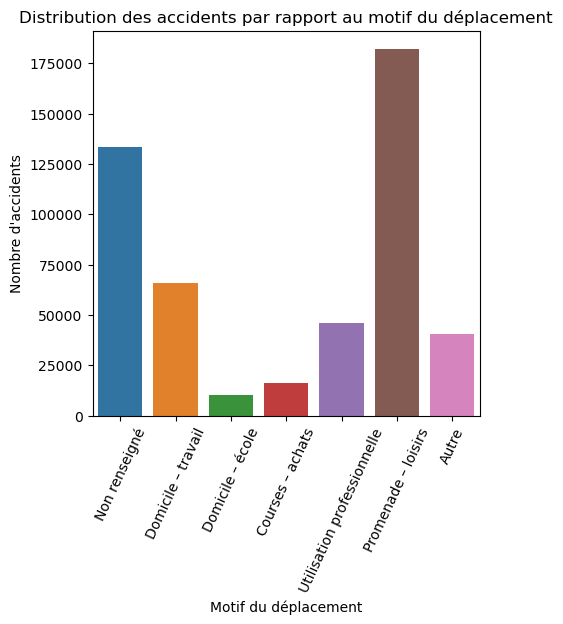

In [25]:
plt.figure(figsize= (5, 5))
sns.countplot(x = df['trajet'])
plt.xlabel("Motif du déplacement")
plt.ylabel("Nombre d'accidents")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Non renseigné', 'Domicile – travail', "Domicile – école", "Courses – achats", "Utilisation professionnelle", "Promenade – loisirs", "Autre"], rotation=65)
plt.title('Distribution des accidents par rapport au motif du déplacement')
plt.show();

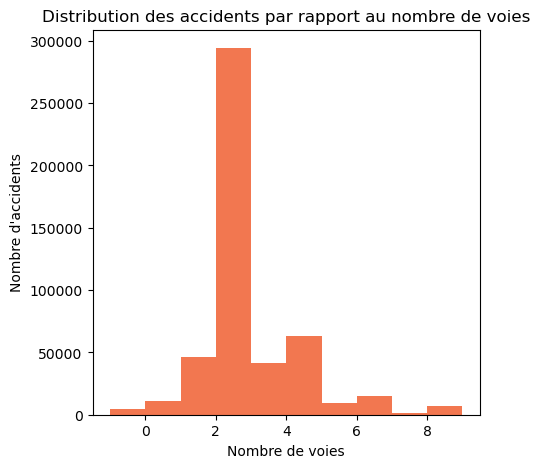

In [26]:
plt.figure(figsize= (5, 5))
plt.hist(df['nbv'],  color = ['#f27750'], label = ['nbv'])

plt.xlabel("Nombre de voies")
plt.ylabel("Nombre d'accidents")
plt.title('Distribution des accidents par rapport au nombre de voies')
plt.show();

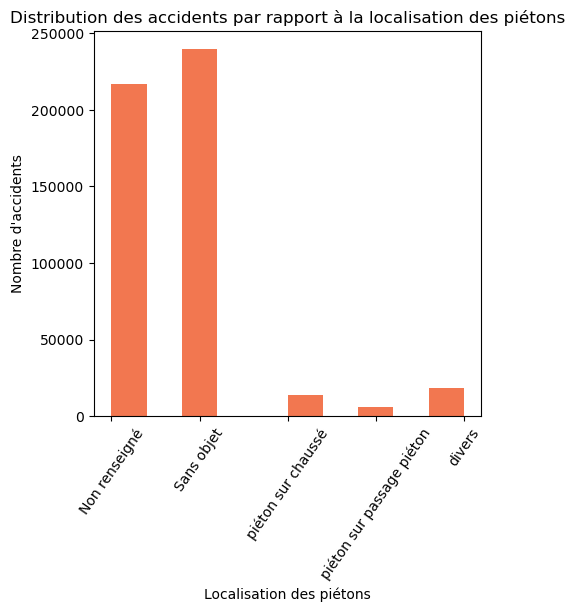

In [27]:
plt.figure(figsize= (5, 5))
plt.hist(df['locp'],  color = ['#f27750'], label = ['locp'])

plt.xlabel("Localisation des piétons")
plt.ylabel("Nombre d'accidents")
plt.xticks([-1, 0, 1, 2, 3], ['Non renseigné', 'Sans objet', "piéton sur chaussé", "piéton sur passage piéton", "divers"], rotation=55)
plt.title('Distribution des accidents par rapport à la localisation des piétons')
plt.show();

In [28]:
# mode de déplacement

# marche = 0
df['catv'] = df['catv'].mask(df['catv'] < 0, 0)

# edpm : trotinette électriques, monoroues, gyropodes, etc = 1
df['catv'] = df['catv'].replace([50, 60, 41, 42, 43], 100)

# vélo = 2
df['catv'] = df['catv'].replace([1, 80], 200)

# 2RM = 3
df['catv'] = df['catv'].replace([2, 4, 5, 6, 30, 31, 32, 33, 34, 35, 36], 300)

# VT (transports en commun) = 4
df['catv'] = df['catv'].replace([18, 19, 37, 38, 39, 40], 400)

# VU (véhicule utilitaire) et PL = 5
df['catv'] = df['catv'].replace([10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 99], 500)

# VL (voiture)  = 6
df['catv'] = df['catv'].replace([3, 7, 8, 9], 600)

df['catv'] = df['catv'].replace([100, 200, 300, 400, 500, 600], [1, 2, 3, 4, 5, 6])

df.catv.value_counts()

catv
6    315604
3     87270
5     49782
2     24105
1      9163
4      7184
0      1074
Name: count, dtype: int64

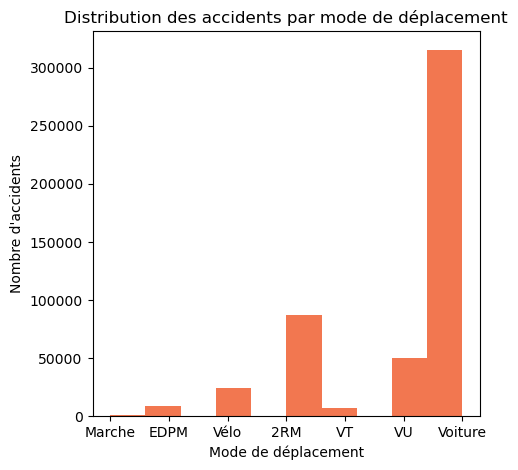

In [29]:
plt.figure(figsize= (5, 5))
plt.hist(df['catv'],  color = ['#f27750'], label = ['catv'])

plt.xlabel("Mode de déplacement")
plt.ylabel("Nombre d'accidents")
plt.xticks([0,1, 2, 3,4,5,6], ['Marche', 'EDPM', "Vélo", "2RM", "VT", "VU", "Voiture"])
plt.title('Distribution des accidents par mode de déplacement')
plt.show();

In [30]:
# présence ou absence de système de sécurité
df['secu1'] = df['secu1'].replace([1, 2, 3, 4, 5, 6, 7, 9], 1)  # présence

df['secu1'] = df['secu1'].replace([0, 8], 2)                    # absence
df['secu1'] = df['secu1'].mask(df['catv'] < 0, 2)

df.secu1.value_counts()

secu1
 1    388294
 2    100297
-1      5591
Name: count, dtype: int64

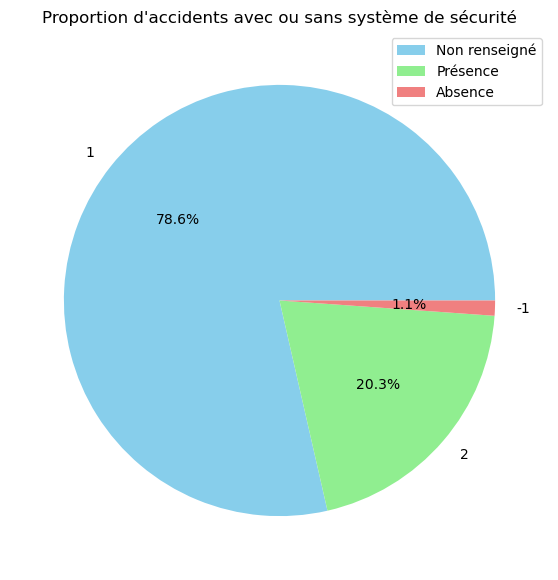

In [31]:
plt.figure(figsize=(7,7))
plt.title("Proportion d'accidents avec ou sans système de sécurité")
df.secu1.value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.ylabel('')
plt.legend(labels=["Non renseigné", "Présence", "Absence"])
plt.show();

In [32]:
# place : place occupé dans le transport

# La variable "-1" correspond à "non concerné" et sont constitués de 25 lignes. Elles sont donc supprimés.
df = df.loc[df['place'] >= 1]

### Variable cible

In [34]:
print(df.grav.value_counts())

print("-1 : non concerné, 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger")

grav
 1    207351
 4    197494
 3     75986
 2     13047
-1       279
Name: count, dtype: int64
-1 : non concerné, 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger


Comme on a pu le voir précédemment, le jeu de données est déséquilibré sur la variable cible. Par exemple, la proportion d'accident mortel est plus faible que celle d'indemne. Pour cela nous avons combiné les variables indemne et non concerné ensemble, car si la personne n'est pas concerné par la gravité c'est qu'elle est indemne.

In [36]:
df.grav = df.grav.astype(str)

# regroupement indemne et non renseigné
df.grav = [value.replace("-1", "1") for value in df["grav"]]

# regroupement de tué, blessé hospitalisé et blessé léger ensemble
df.grav = [value.replace("3", "2") for value in df["grav"]]
df.grav = [value.replace("4", "2") for value in df["grav"]]

# nouvelles variables
df.grav = [value.replace("1", "0") for value in df["grav"]]
df.grav = [value.replace("2", "1") for value in df["grav"]]
df.grav = df.grav.astype(int)

print(df.grav.value_counts())

print("")
print("Variables d'origines :", "1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger")
print("Nouvelles variables  :", "1 – Accident sans gravité, 2 – Accident avec gravité")

grav
1    286527
0    207630
Name: count, dtype: int64

Variables d'origines : 1 – Indemne, 2 – Tué, 3 – Blessé hospitalisé, 4 – Blessé léger
Nouvelles variables  : 1 – Accident sans gravité, 2 – Accident avec gravité


### Matrice de corrélation

Text(0.5, 1.0, 'Variables corrélées ')

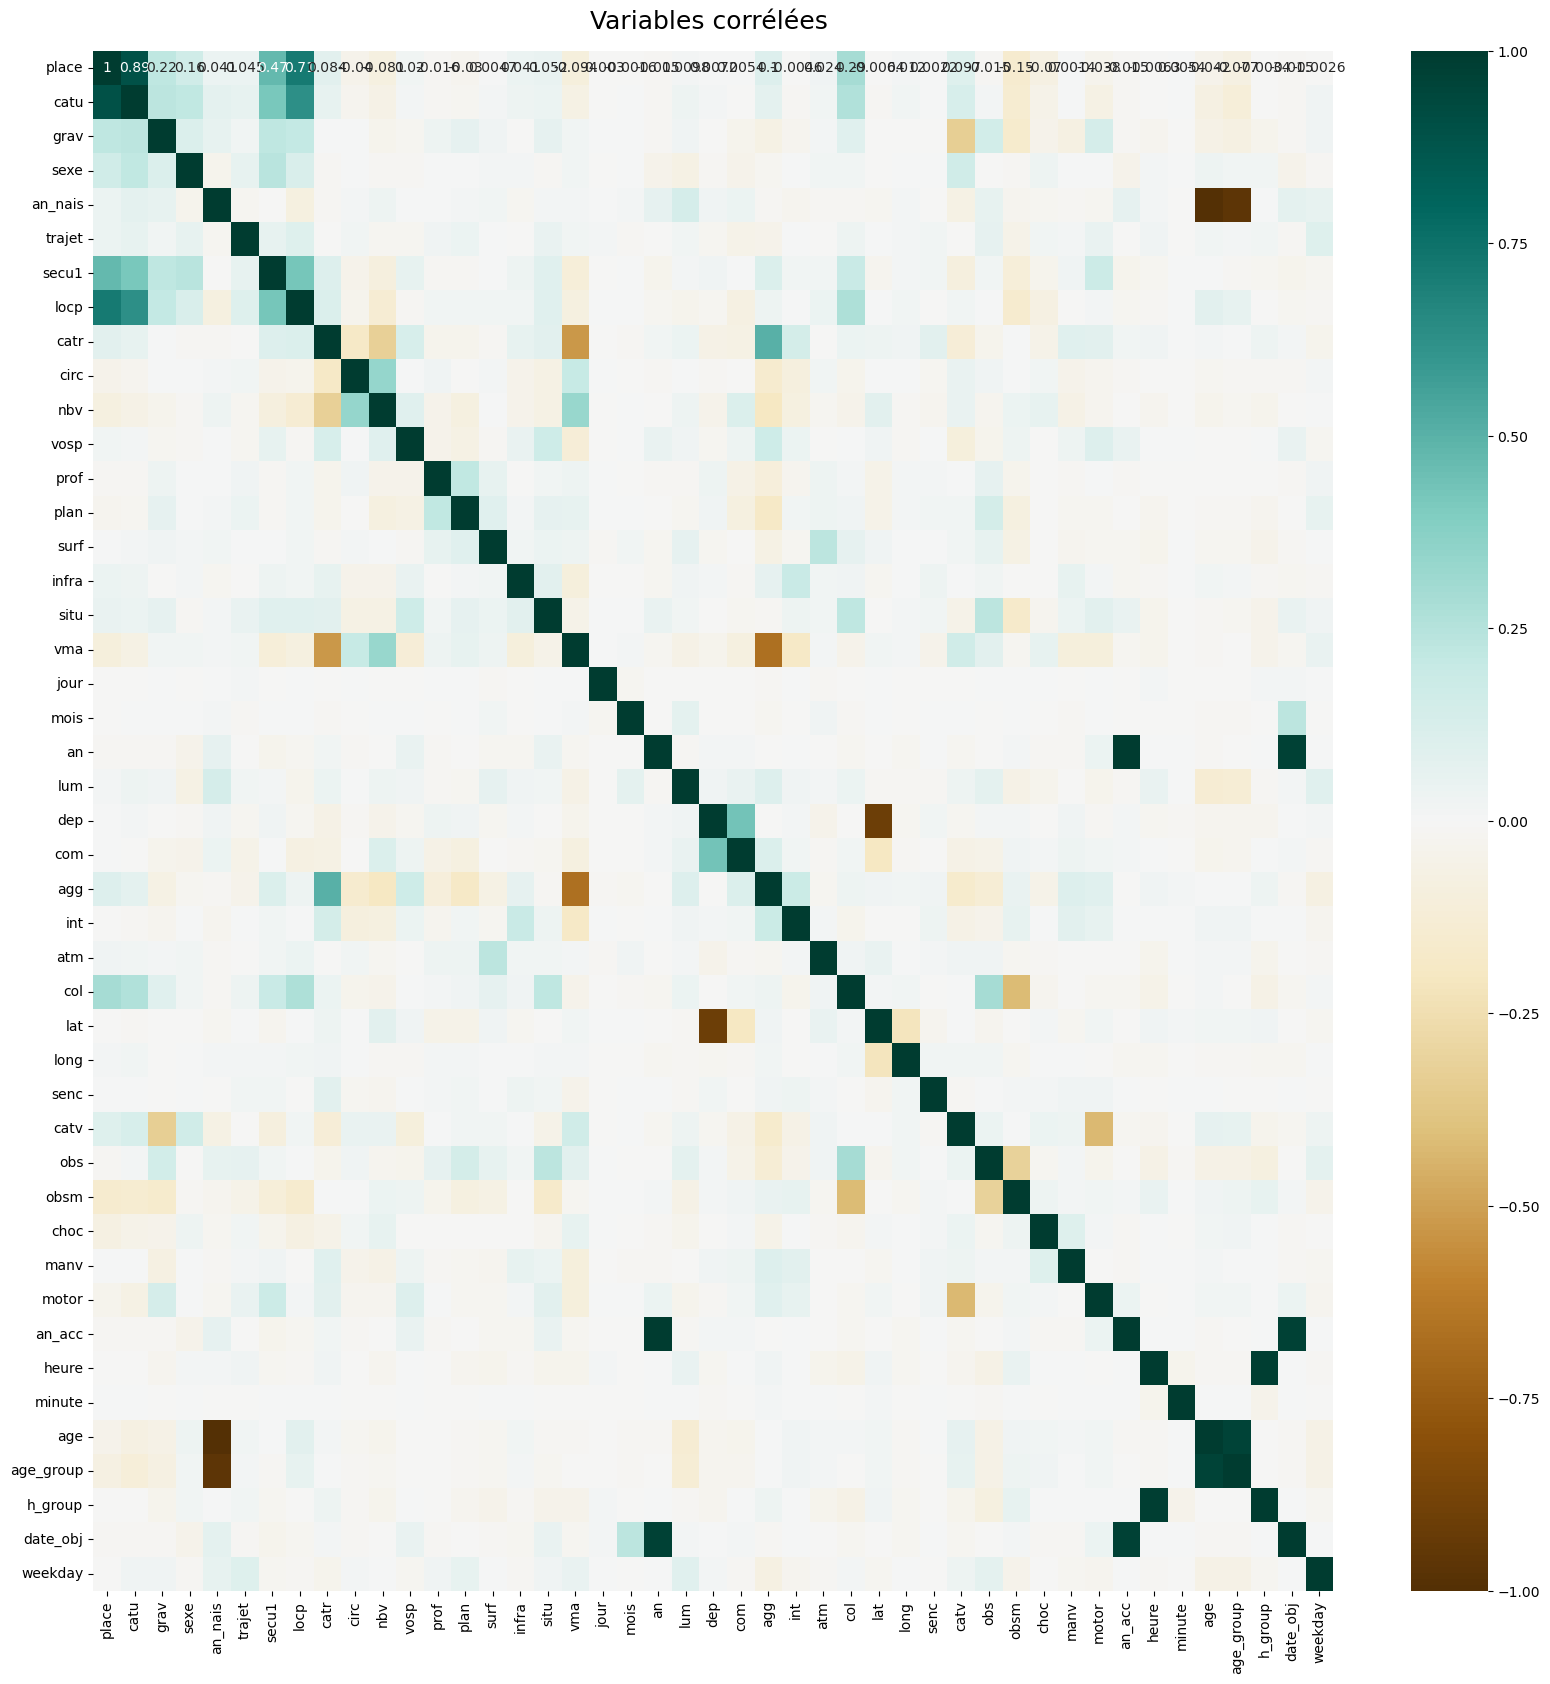

In [38]:
# Matrice de corrélation
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables corrélées ', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Variables corrélées avec la variable cible : gravité')

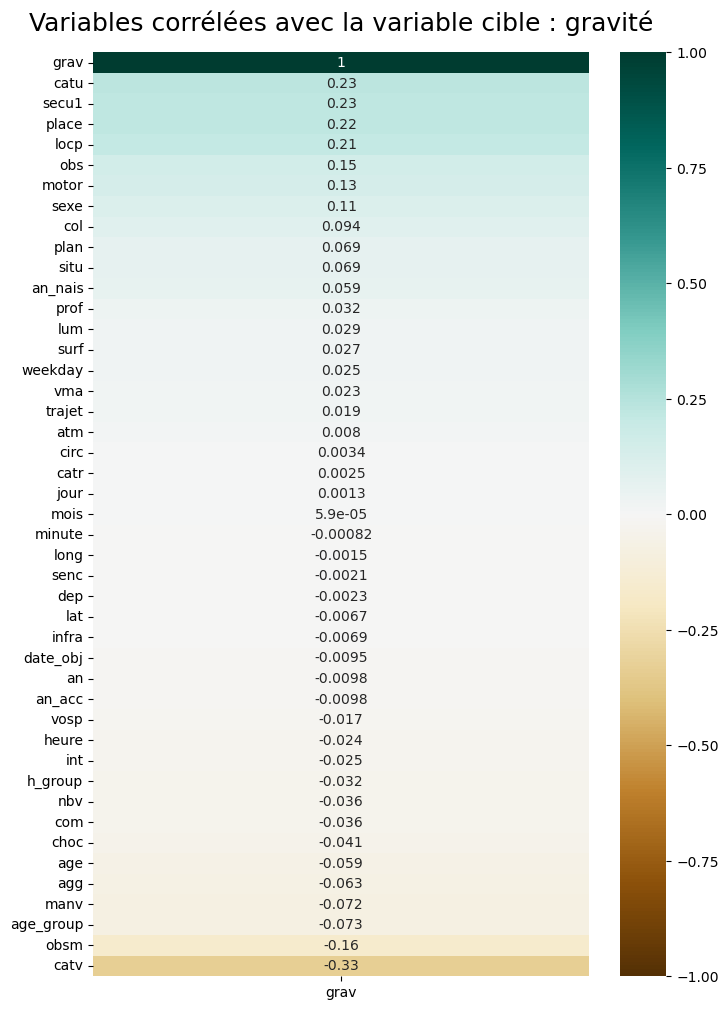

In [39]:
# corrélation avec la variable cible
sorted_corrs_t = df.corr()['grav'].abs().sort_values(ascending=False)
sorted_corrs_t

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['grav']].sort_values(by='grav', 
                                                                   ascending=False), vmin=-1, vmax=1, annot=True, 
                      cmap='BrBG')
heatmap.set_title('Variables corrélées avec la variable cible : gravité', fontdict={'fontsize':18}, pad=16)

In [40]:
df.head(1)

,place,catu,grav,sexe,an_nais,trajet,secu1,locp,catr,circ,nbv,vosp,prof,plan,surf,infra,situ,vma,jour,mois,an,lum,dep,com,agg,int,atm,col,lat,long,senc,catv,obs,obsm,choc,manv,motor,an_acc,heure,minute,age,age_group,h_group,date_obj,weekday
0,1,1,1,1,2008.0,5,1,-1,4,2,2,0,1,1,1,0,1,50,19,10,2022,1,26,26198,2,3,1,3,44.55942,4.72572,1,3,0,2,1,9,1,2022,16,15,14.0,2,6,2022-10-19,2


In [41]:
df = df.drop(["an_acc",
              "dep",  # doublon avec les variables la et long
              "mois", # doublon avec weekday
              "heure", # doublon avec tranche horaire
              "minute", # doublon avec tranche horaire
              "jour", # doublon avec weekday
              "date_obj", # doublon avec weekday
              "an_nais", # doublon avec tranche âge
              "age",     # doublon avec tranche âge
              "an"       # année de l'accident
                ], axis=1)

# Supression des lignes contenant des données manquantes
df = df.dropna()

### Sauvegarde du dataset final

In [43]:
df.to_csv('dataset/dataset_final.csv', index=False)